# Product Utilization and Engagement

## Importing the libraries 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing the datasets

In [ ]:
expansion = pd.read_csv('files/cleaned_expansion.csv')
utilization = pd.read_csv('files/cleaned_utilization_eda.csv')

## Creating churn flag

In [ ]:
expansion['arr_change'] = expansion['future_arr'] - expansion['current_arr']
expansion['perc_change'] = (expansion['future_arr'] - expansion['current_arr']) / expansion['current_arr']
expansion['churn_flag'] = (expansion['future_arr'] < expansion['current_arr'] * 0.8).astype(int)

## Calculate the change in utilization

In [ ]:
utilization['utilization_change'] = utilization['seat_utilization'] - utilization['seat_utilization_M_before']

## Merge the Datasets

In [ ]:
merged = pd.merge(expansion, 
                  utilization[['id', 'score_date', 'utilization_change']], 
                  on=['id', 'score_date'], 
                  how='inner')

## Visualization

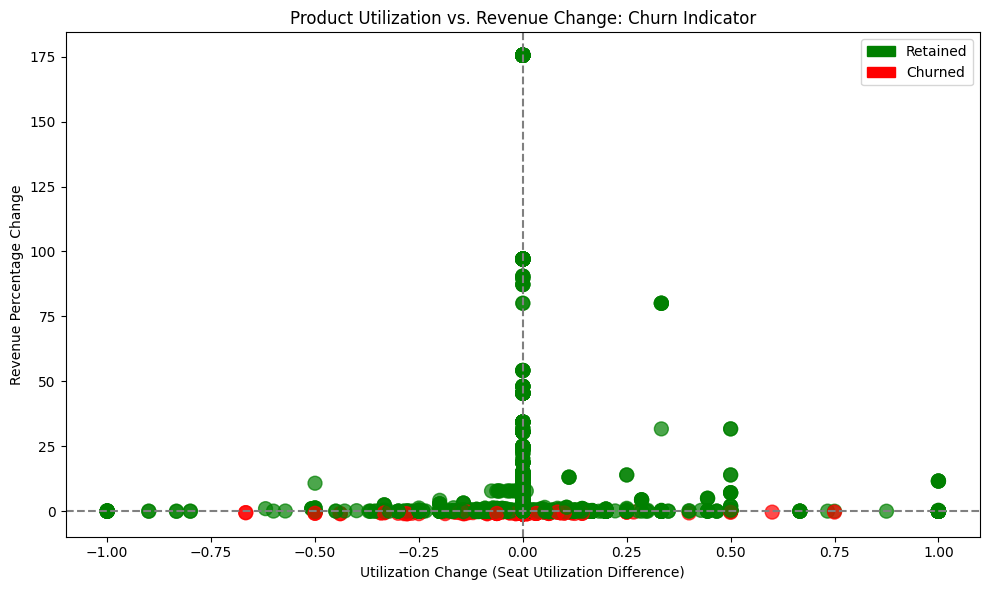

In [ ]:
plt.figure(figsize=(10, 6))

colors = merged['churn_flag'].map({0: 'green', 1: 'red'})

plt.scatter(merged['utilization_change'], merged['perc_change'], c=colors, s=100, alpha=0.7)

plt.xlabel('Utilization Change (Seat Utilization Difference)')
plt.ylabel('Revenue Percentage Change')
plt.title('Product Utilization vs. Revenue Change: Churn Indicator')

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

import matplotlib.patches as mpatches
retained_patch = mpatches.Patch(color='green', label='Retained')
churned_patch = mpatches.Patch(color='red', label='Churned')
plt.legend(handles=[retained_patch, churned_patch])

plt.tight_layout()
plt.show()
